### IMDB

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

MY_LENGTH = 80 # 영화평에 사용된 단어 수
MY_WORD = 5000 # 사전에 포함할 단어 수
MY_SAMPLE = 10 # 샘플 영화평

In [3]:
from keras.datasets import imdb

# IMDB 데이터셋 로드
(X_train, y_train), (X_test, y_test) = imdb.load_data()

# 전체 데이터셋을 합친 후 단어의 종류의 수 확인 (약 88,585 종류)
word_set = set()
for review in X_train + X_test :
    word_set.update(review)
    
num_words = len(word_set)
print(f"단어 중류의 수 : {num_words}")

단어 중류의 수 : 88585


In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MY_WORD)
# 자주 등장하는 상위 MY_WORD개의 단어를 지정하여 업로드
# IMDB word index
print(f'샘플 영화평 : \n {X_train[MY_SAMPLE]}') # 지정된 샘플(10)의 데이터(정수)를 보여준다
print(f'총 단어 수 : \n {len(X_train[MY_SAMPLE])}') # 지정된 샘플의 단어 갯수
print(f'감성(0=부정, 1=긍정): \n {y_train[MY_SAMPLE]}') # 지정된 샘플의 라벨 표시

샘플 영화평 : 
 [1, 785, 189, 438, 47, 110, 142, 7, 6, 2, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 2, 43, 1076, 21, 1407, 419, 5, 2, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 2, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 2, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 2, 2140, 2, 648, 1430, 2, 2, 5, 27, 3000, 1432, 2, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 2, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 4397, 18, 183, 8, 81, 19, 12, 45, 

In [5]:
from tensorflow.keras.datasets import imdb

MY_WORD = 5000 # 사전 단어수
MY_SAMPLE = 10 # 샘플 영화평

# 데이터 로드
(X_train, _), (_, _) = imdb.load_data(num_words=MY_WORD)

# word-index 매핑 가져오기
word_index = imdb.get_word_index()

# word-index 매핑 반전하여 index to word 매핑 생성
index_to_word = {index: word for word, index in word_index.items()}

# 샘플 영화평을 단어로 변환하여 출력
decoded_review = ' '.join(index_to_word[index] for index in X_train[MY_SAMPLE])
print(f'샘플 영화평 : \n {decoded_review}')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
샘플 영화평 : 
 the clear fact entertaining there life back br is and show of performance stars br actors film him many should movie reasons to and reading and are in of scenes and and of and out compared not boss yes to and show its disappointed fact raw to it justice by br of where clear fact many your way and with city nice are is along wrong not as it way she but this anything up haven't been by who of choices br of you to as this i'd it and who of shot you'll to love for and of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy and cry in chemistry but and all it maybe this is wing film job live of and relief and level names and and to be stops serial and watch is men go this of wing american from and moving is accepted put this of jerry for places so work and watch and lot br that from sometimes wondered make department introduced to wondered from action at turns in low that 

In [7]:
from pprint import pprint
# pprint(word_index)

{'\x08\x08\x08\x08a': 68893,
 '\x10own': 70879,
 "'": 755,
 "''": 17448,
 "''a": 57351,
 "''after": 64015,
 "''bad": 72030,
 "''cannibal": 58448,
 "''clients''": 80824,
 "''dark''": 66872,
 "''empire": 52876,
 "''family": 85943,
 "''gaslight''": 58747,
 "''heart''": 75354,
 "''high": 66908,
 "''holy": 83565,
 "''human''": 61364,
 "''humans''": 88090,
 "''i'm": 61351,
 "''if": 62727,
 "''inuyasha''": 61770,
 "''little''": 58164,
 "''maison": 85895,
 "''ned''": 62202,
 "''negative''": 76149,
 "''nice": 57008,
 "''oh": 45418,
 "''on": 66910,
 "''oversexed''": 75509,
 "''peeping": 81867,
 "''professionals''": 76109,
 "''ranma": 44903,
 "''raptors''": 70722,
 "''return": 55138,
 "''saint": 51394,
 "''scarface''": 51257,
 "''sea": 49404,
 "''talent": 84926,
 "''terrorists''": 81627,
 "''the": 20197,
 "''their": 84051,
 "''this": 66430,
 "''thunderball": 87604,
 "''troubled''": 79833,
 "''unpleasant": 66417,
 "''villain": 71277,
 "''voyeur''": 70370,
 "''we're": 66244,
 "''while''": 65559,
 "

In [8]:
pprint(index_to_word)

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

상위 5000개로 지정한 word-index를 출력해본다

In [9]:
# 단어 목록 확인
top_words = [word for word, index in word_index.items() if index <= MY_WORD]

print(f'상위 {MY_WORD}개의 단어 목록 :')
for i, word in enumerate(top_words):
    print(i+1, word)

상위 5000개의 단어 목록 :
1 woods
2 hanging
3 woody
4 bringing
5 wooden
6 errors
7 dialogs
8 kids
9 want
10 travel
11 dinosaurs
12 wrong
13 subplots
14 fit
15 screaming
16 fix
17 effects
18 disturbed
19 purpose
20 needed
21 master
22 feeling
23 cinematic
24 tech
25 saying
26 altogether
27 nicely
28 mummy
29 lots
30 nature
31 superficial
32 extent
33 much
34 doubts
35 spin
36 hong
37 corporate
38 hal
39 ham
40 had
41 has
42 hat
43 crowd
44 bottom
45 starring
46 shoots
47 raped
48 explosions
49 chain
50 whoever
51 chair
52 ballet
53 jerk
54 locked
55 exact
56 minute
57 unintentionally
58 cusack
59 opposed
60 following
61 convincingly
62 surfing
63 jim
64 seriously
65 spoken
66 concert
67 wandering
68 turned
69 turner
70 opposite
71 imagined
72 menacing
73 convoluted
74 west
75 motives
76 photos
77 technology
78 visually
79 being
80 substance
81 with
82 rage
83 dirty
84 watches
85 watched
86 tricks
87 caused
88 causes
89 portrays
90 more
91 company
92 learn
93 huge
94 hugh
95 paper
96 scott
97 ga

In [10]:
# 각 영화평의 길이를 일정하게 맞춤

X_train = pad_sequences(sequences = X_train, truncating = 'post', # 뒤부분 삭제, pre는 앞부분
                        padding='post', maxlen=MY_LENGTH) # 80단어보다 짧으면 뒤(post)를 ...

X_test = pad_sequences(sequences=X_test, truncating='post',
                       padding='post', maxlen=MY_LENGTH)

print(f'학습용 입력 데이터 모양 : {X_train.shape}')
print(f'학습용 출력 데이터 모양 : {y_train.shape}')
print(f'평가용 입력 데이터 모양 : {X_test.shape}')
print(f'평가용 출력 데이터 모양 : {y_test.shape}')


학습용 입력 데이터 모양 : (25000, 80)
학습용 출력 데이터 모양 : (25000,)
평가용 입력 데이터 모양 : (25000, 80)
평가용 출력 데이터 모양 : (25000,)


In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.regularizers import l2

# RNN 구현
model = Sequential()
# 임베딩 차원 확장 32 -> 128 -> 64
model.add(Embedding(input_dim=MY_WORD, output_dim=64,
                    input_length=MY_LENGTH))
# 첫 번째 양방향 LSTM: return_sequences=True 로 다음 LSTM 층을 위해 시퀀스 전체 반환
# model.add(LSTM(units=64, input_shape=(MY_LENGTH,32)))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
# 첫번째 dropout
model.add(Dropout(0.3))

# 두 번째 LSTM: 기본값(return_sequences=False)이므로 (batch, 64) 반환
model.add(Bidirectional(LSTM(units=64)))
# 두번째 dropout
model.add(Dropout(0.3))
# 가중치 규제 추가 kernel_regularizer=l2(1e-4)
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(1e-4)))

print('RNN 요약')
model.summary()

RNN 요약


c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # 얼리스탑
# from tensorflow.keras.callbacks import EarlyStopping

# es = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )
# history = model.fit(
#     X_train, y_train,
#     epochs=30,
#     batch_size=128,
#     validation_split=0.2,
#     callbacks=[es],
#     verbose=1
# )


In [58]:
# 기본 모델
model = Sequential()

# Embedding 레이어 (output_dim=32)
model.add(Embedding(
    input_dim=MY_WORD,      # 어휘(vocab) 크기
    output_dim=32,          # 임베딩 차원
    input_length=MY_LENGTH  # 시퀀스 길이
))

# 단방향 LSTM 1층 (units=64)
model.add(LSTM(units=64, input_shape=(MY_LENGTH, 32)))

# 출력층 (이진 분류용 sigmoid)
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['acc'])
model.fit(x=X_train, y= y_train, epochs=10, batch_size=200, verbose=1)

c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - acc: 0.5974 - loss: 0.6392
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - acc: 0.8336 - loss: 0.3979
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - acc: 0.8524 - loss: 0.3520
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.8681 - loss: 0.3217
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.8807 - loss: 0.2970
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.8833 - loss: 0.2969
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.8913 - loss: 0.2773
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.9006 - loss: 0.2616
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.9054 - loss: 0.2447
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - acc: 0.9130 - loss: 0.2236


In [55]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
# RNN 학습
# 옵티마이저 adam -> RMSprop
# learning_rate 1e-3 -> 5e-4
optimizer = RMSprop(learning_rate=5e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['acc'])

# 검증 loss가 1회기(patience=1) 개선되지 않으면 lr을 factor만큼 감소
rlr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=1e-6,
    verbose=1
)

print("학습 시작")
# batch_size 200 -> 128
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2,
          batch_size=128, verbose=1, callbacks=[rlr])

학습 시작
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - acc: 0.9028 - loss: 0.2542 - val_acc: 0.7938 - val_loss: 0.4923 - learning_rate: 5.0000e-04
Epoch 2/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.9166 - loss: 0.2230
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - acc: 0.9166 - loss: 0.2231 - val_acc: 0.7958 - val_loss: 0.5606 - learning_rate: 5.0000e-04
Epoch 3/10
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - acc: 0.9325 - loss: 0.1911
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - acc: 0.9325 - loss: 0.1912 - val_acc: 0.7956 - val_loss: 0.5807 - learning_rate: 2.5000e-04
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - acc: 0.9401 - loss: 0.1773
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - acc: 0.9401 - loss: 0.1773 - val_acc: 0.7850 - 

In [59]:
# RNN 평가
score = model.evaluate(x=X_test, y=y_test,
                       verbose=1)

print(f'최종 정확도 : {score[1]:.2f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.7833 - loss: 0.5855
최종 정확도 : 0.78


In [29]:
# RNN 예측 
test = X_test[MY_SAMPLE].reshape(1, 80)
pred = model.predict(test)
pred=(pred>0.5)

print(f'샘플 영화평 : {test}')
print(f'RNN 감성 예측 : {pred}')
print(f'정답(0=부정, 1=긍정) : {y_test[MY_SAMPLE]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
샘플 영화평 : [[   1 1581   34    2    2   23    6 1374 1120    7  107  349    2 1496
    11    2   18  397 3767    7    4  107   84    2   56   68  456 1402
     2   39    4 1374    9   35  204    5   55 4412  212  193   23    4
   326   45    6 1109    8 1738    2   15   29  199 1040    5 2684   11
    14 1403  212 1528   10   10 2160    2    9    4  452   37    2    4
   598  425    5   45 4394  138   59  214  467    4]]
RNN 감성 예측 : [[ True]]
정답(0=부정, 1=긍정) : 1


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# (5) 테스트셋 전체에 대한 예측 확률 계산
#     model.predict() 결과가 (N,1) 혹은 (N,) 형태라고 가정
y_prob = model.predict(X_test)       # shape = (N, 1) 또는 (N,) 
y_prob = y_prob.reshape(-1)          # (N,) 형태로 평탄화(flatten)
y_pred = (y_prob > 0.5).astype(int)  # threshold=0.5 → 이진 레이블 (0/1) 배열 생성

# 실제 정답 레이블 (0/1) 형태. 만약 (N,1)이라면 reshape 해 주는 것이 안전
y_true = y_test.reshape(-1)

# 혼동 행렬
cm = confusion_matrix(y_true, y_pred)
print("=== Confusion Matrix (순서: [0, 1]) ===")
print(cm)

# (7) 분류 리포트 계산 (정밀도, 재현율, F1-score, support)
report = classification_report(y_true, y_pred, target_names=['부정(0)', '긍정(1)'], digits=4)
print("\n=== Classification Report ===")
print(report)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
=== Confusion Matrix (순서: [0, 1]) ===
[[10003  2497]
 [ 2951  9549]]

=== Classification Report ===
              precision    recall  f1-score   support

       부정(0)     0.7722    0.8002    0.7860     12500
       긍정(1)     0.7927    0.7639    0.7780     12500

    accuracy                         0.7821     25000
   macro avg     0.7825    0.7821    0.7820     25000
weighted avg     0.7825    0.7821    0.7820     25000



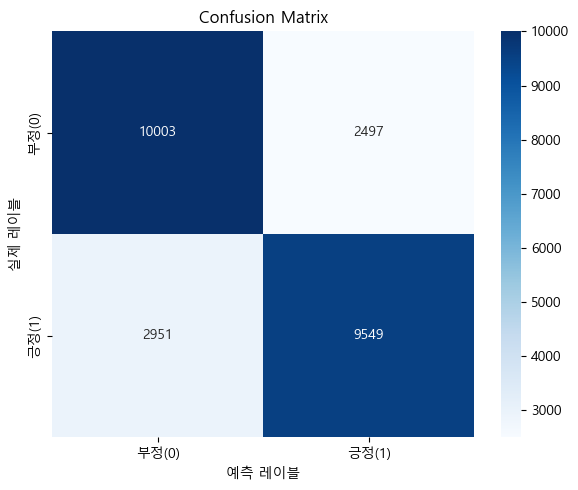

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn 설치되어 있어야 함
import matplotlib.pyplot as plt

# 1) 그래프 내에서 한글이 보이도록 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 2) 마이너스 기호(−)가 깨지는 현상을 방지
plt.rcParams['axes.unicode_minus'] = False


labels = ['부정(0)', '긍정(1)']

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


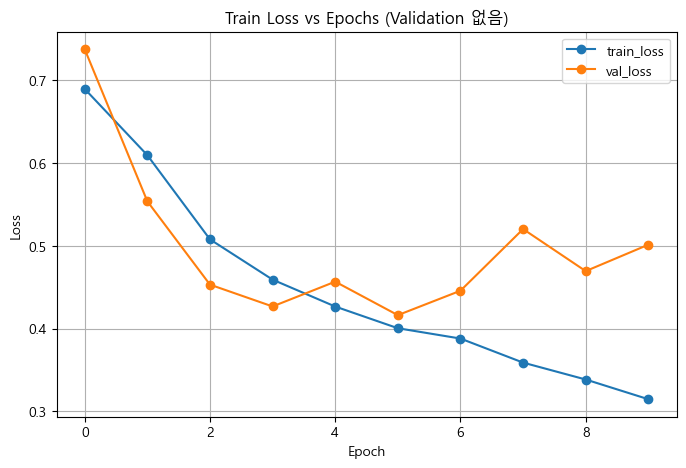

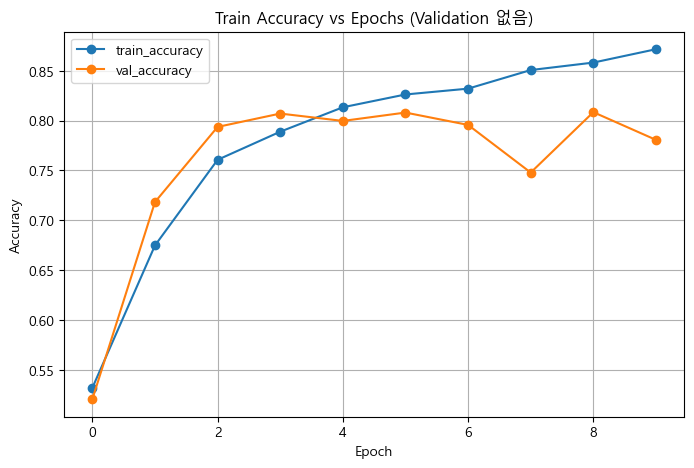

In [54]:
import matplotlib.pyplot as plt

# 1) 기록된 키 확인
print(history.history.keys())
# 출력: dict_keys(['acc', 'loss'])

# 2) Loss 곡선 그리기
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss', marker='o')
plt.plot(history.history['val_loss'], label='val_loss', marker='o')
plt.title('Train Loss vs Epochs (Validation 없음)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3) Accuracy 곡선 그리기
plt.figure(figsize=(8,5))
plt.plot(history.history['acc'], label='train_accuracy', marker='o')
plt.plot(history.history['val_acc'], label='val_accuracy', marker='o')
plt.title('Train Accuracy vs Epochs (Validation 없음)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


에폭은 동일한 10에서 테스트 하고싶었음

예제 코드(기본)
acc: 0.7833 - loss: 0.5855

임베딩 32 -> 128 차원 확장
acc: 0.7555 - loss: 0.6536

+ 검증데이터 분리
+ 양방향 LSTM
acc: 0.7636 - loss: 1.1111

+ LSTM 1층 -> 2층 확장
acc: 0.7635 - loss: 0.9227

+ LSTM 사이사이 과적합 방지용 드롭아웃 추가
acc: 0.7581 - loss: 0.9433

+ 옵티마이저를 Adam -> RMSprop 변경
acc: 0.7498 - loss: 1.3729

+ 임베딩 128 -> 64 차원 다시 축소
acc: 0.7684 - loss: 0.5388

+ RMSprop learning_rate 1e-3 -> 5e-4
+ ReduceLROnPlateau 학습률 스케쥴러 사용
+ batch 200 -> 128
+ dropout 0.5 -> 0.3
+ 가중치 규제 추가 kernel_regularizer=l2(1e-4)
acc: 0.7744 - loss: 0.7018